In [1]:
from optimize import optimize
from signals import compute_features, detect_trade_signals
from backtester import Backtester

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [4]:
## commodity prices ##
commodities = pd.read_csv('../Data/raw/commodity_prices.csv',index_col=['Date'])
commodities.index = pd.to_datetime(commodities.index)

## stock prices ##
stocks = pd.read_csv('../Data/raw/stock_prices.csv',index_col=['Date'])
stocks.index = pd.to_datetime(stocks.index)

### Test optimizer

In [ ]:

# Example pair
commodity = commodities['SI=F Close']
stock = stocks['SNAP']

param_grid = {
    'threshold': np.linspace(0,1,20),
    'streak': [2, 3, 4],
    'quantile': np.linspace(0,1,20)
}

results = optimize(commodity, stock, param_grid)
print(results.head(20))

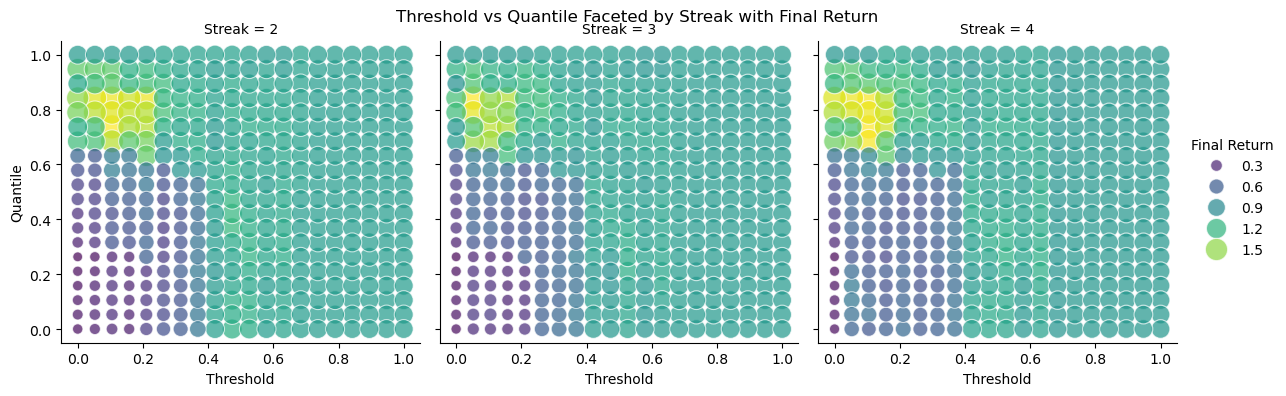

In [17]:
# Create the FacetGrid
g = sns.FacetGrid(results, col='streak', col_wrap=3, height=4, sharex=True, sharey=True)

# Map scatterplots with threshold on x, quantile on y
# Use final_return for size and color
g.map_dataframe(
    sns.scatterplot,
    x='threshold',
    y='quantile',
    size='final_return',
    hue='final_return',
    palette='viridis',
    sizes=(50, 300),
    legend='brief',
    alpha=0.7
)

# Add legends and adjust
g.add_legend(title='Final Return')

# Set axis labels and title for each subplot
g.set_axis_labels('Threshold', 'Quantile')
g.set_titles('Streak = {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Threshold vs Quantile Faceted by Streak with Final Return')

plt.show()

True
True


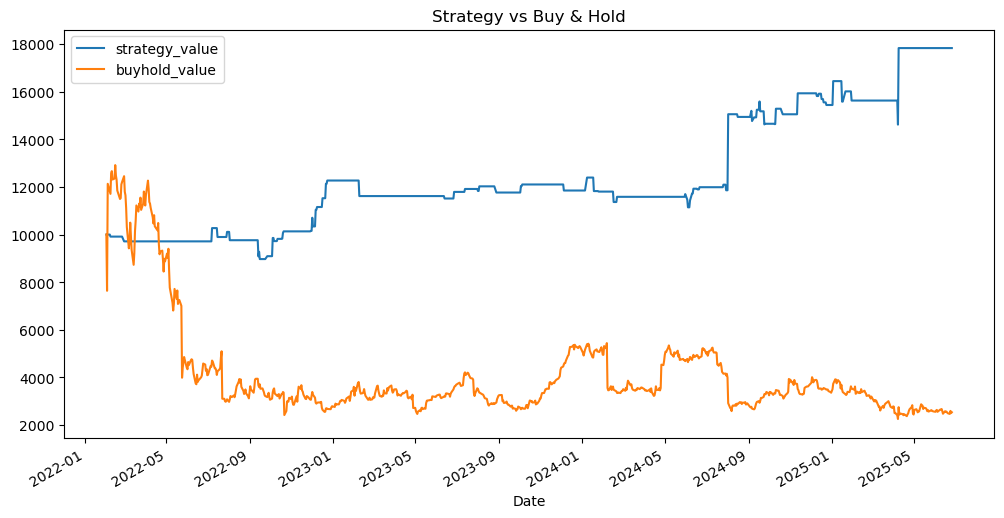

In [38]:
i = 0

threshold = results.iloc[i,:]['threshold']
min_streak = results.iloc[i,:]['streak']
quantile = results.iloc[i,:]['quantile']


features_df = compute_features(commodity,stock)
features_df['stock_price'] = stock
signals_df = detect_trade_signals(
    features_df, 
    threshold=threshold, 
    min_streak=min_streak, 
    quantile=quantile)

bt = Backtester(
    prices = features_df,
    signals = signals_df,
    stock_col = 'stock_price',
    starting_capital = 10_000
)

result = bt.run()

# Visualize
result[['strategy_value', 'buyhold_value']].plot(
    figsize=(12,6), title='Strategy vs Buy & Hold'
)

plt.show()
